<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Exomoon_Code_MK2_Cold_Gas_Giants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Filter Archive

In [1]:
# IMPORTS
import pandas as pd
import math

from astropy import constants as const
from astropy import units as u

# IF USING GOOGLE COLAB TO RUN THIS NOTEBOOK USE THIS CELL:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Read in CSV files

If you are using Google Colab to run this Notebook, use this cell:

In [2]:
archive = pd.read_csv('gdrive/My Drive/Exomoon Project/Exoplanet_Archive.csv')
archive = archive.fillna(0)

If you are using Jupyter Notebook or similar, use this cell:

In [3]:
'''
# READ IN CSV FILE
archive = pd.read_csv(r'C:\Users\Liam PC\OneDrive - Cardiff University\Modules\Exomoons\Archive\Exoplanet_Archive.csv') # PC
#archive = pd.read_csv(r'C:\Users\liamh\OneDrive - Cardiff University\Modules\Exomoons\Archive\Exoplanet_Archive.csv') # TABLET

archive = archive.fillna(0) # REPLACES ALL NaN VALUES WITH 0 - PROBLEM AROSE WHEN FILTERING FOR TRANSIT FLAGS AND DEPTH/DURATION ETC
# LISTING ALL COLUMNS FOR EASY ACCESS TO COLUMNS
archive.columns.values.tolist()
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 46-47: truncated \UXXXXXXXX escape (<ipython-input-3-1b8de2573e6e>, line 9)

# Filtering out by radius
For Earth-sized planets, we use $0.5 ≤ R_⊕ ≤ 2$ and for cold gas giants, we use the radius limits between sub-neptunes $4R_⊕ ≤ R ≤ 2R_J$.

MASS-RADIUS RELATIONS AND CORE-ENVELOPE DECOMPOSITIONS
OF SUPER-EARTHS AND SUB-NEPTUNES (Howe et al 2014) https://iopscience.iop.org/article/10.1088/0004-637X/787/2/173/pdf

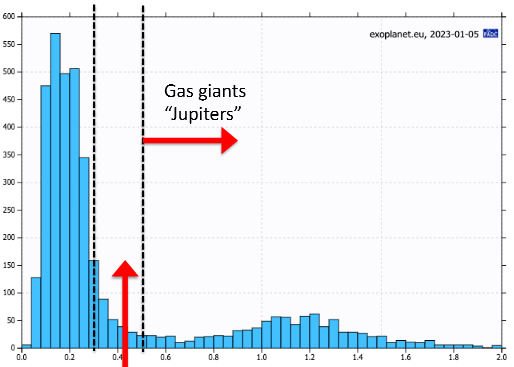

In [38]:
rade = archive['pl_rade']
radj = archive['pl_radj']
rad_filt = archive[(rade >= 4) & (radj <= 10)]

print('Done.')
rad_filt

Done.


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,6.095,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,5667,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5667,5668,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5668,5669,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5669,5670,ups Leo b,ups Leo,b,0,0,TIC 49430557,Gaia DR2 3794167001116433152,1,1,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0


In [39]:
#pd.set_option('display.max_columns', None) # PRINTS WHOLE TABLE OF COLUMNS - MAY CRASH COMPUTER SINCE IT IS A LARGE DATAFRAME
#pd.set_option('display.max_rows', None) # PRINTS WHOLE TABLE OF ROWS - MAY CRASH COMPUTER SINCE IT IS A LARGE DATAFRAME

#THESE ARE THE CONDITIONS FOR EACH COLUMN, WHERE WE WANT TO MEET SPECIFIC CONDITIONS FOR EACH INDIVIDUAL COLUMN AND REMOVE ANY ROWS THAT DO NOT MEET THESE CONDITIONS
disc = rad_filt['discoverymethod'].str.contains('Transit') # CONTAINS THE WORD 'transit' IN EACH ROW
con_A = rad_filt['tran_flag'] == 1 # EXACTLY EQUAL TO 1
con_B = rad_filt['ttv_flag'] == 1
con_C = rad_filt['pl_trandep'] != 0 # NOT EQUAL TO 0
con_D = rad_filt['pl_trandur'] != 0
con_E = rad_filt['pl_tranmid'] != 0

combined = disc | con_A | con_B | con_C | con_D | con_E # THIS IS THE COMBINATION OF ALL THE CONDITIONS WITH '|' BEING THE 'or' OPERATOR

method_radius_filt = rad_filt[combined]

#method_radius_filt[['discoverymethod','tran_flag','ttv_flag','pl_trandep','pl_trandur','pl_tranmid']] # TEST TO SEE IF THE ABOVE CODE WORKS
print('Done.')
len(method_radius_filt)

Done.


1171

# Calculating the CHZ
#### Using Equations from page 10 in Kopparapu et al (2013)
###### https://iopscience.iop.org/article/10.1088/0004-637X/765/2/131/pdf#page=10.44

#### **Assuming a Sun-like star temperature*...

In [40]:
T_seff = method_radius_filt['st_teff'] - 5780

# Recent Venus
a_v = 1.4316e-4
b_v = 2.9875e-9
c_v = -7.5702e-12
d_v = -1.1635e-15

VS_eff = 1.7753 + (a_v*T_seff) + (b_v*T_seff**2) + (c_v*T_seff**3) + (d_v*T_seff**4)


# Early Mars
a_m = 5.4513e-5
b_m = 1.5313e-9
c_m = -2.7786e-12
d_m = -4.8997e-16

MS_eff = 0.3179 + (a_m*T_seff) + (b_m*T_seff**2) + (c_m*T_seff**3) + (d_m*T_seff**4)

#print(VS_eff, MS_eff)
print('Done.')

Done.


In [41]:
R_star = method_radius_filt['st_rad']*const.R_sun # CONVERTING RADIUS OF STAR IN METERS
T = method_radius_filt['st_teff']

L = 4 * math.pi * R_star**2 * const.sigma_sb * T**4 # CALCULATION OF LUM RATHER THAN USING GIVEN LUM
LL_sun = L/const.L_sun

in_CHZ = (LL_sun/VS_eff)**0.5 # CALCULATION FOR THE INNER LIMIT
out_CHZ = (LL_sun/MS_eff)**0.5 # CALCULATION FOR THE OUTER LIMIT

in_CHZ = pd.DataFrame({'in_CHZ': in_CHZ}) # GIVES TWO NEW COLUMNS OWN HEADER
out_CHZ = pd.DataFrame({'out_CHZ': out_CHZ}) # GIVES TWO NEW COLUMNS OWN HEADER
print('Done.')

Done.


In [42]:
# ADDING THE NEW CHZ COLUMNS TO THE FILTERED DATAFRAME
filtered = pd.concat([method_radius_filt, in_CHZ, out_CHZ], axis=1) # CONCAT IS CONCATENATION - JOINING TWO STRINGS INTO ONE
filtered

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,in_CHZ,out_CHZ
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0,0.607688,1.466131
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0,0.842657,1.994044
27,28,47 UMa b,47 UMa,b,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,9,3,0,0,0.936399,2.203702
28,29,47 UMa c,47 UMa,c,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,9,3,0,0,0.936399,2.203702
29,30,47 UMa d,47 UMa,d,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,9,3,0,0,0.936399,2.203702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,5659,rho CrB d,rho CrB,d,HD 143761,HIP 78459,TIC 458494003,Gaia DR2 1323427759184545536,1,4,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,1,2,0,0,1.027532,2.424146
5660,5661,tau Boo b,tau Boo,b,HD 120136,HIP 67275,TIC 72506701,Gaia DR2 1244571953471006720,2,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,3,1,0,0,1.311622,3.012042
5666,5667,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0,1.312329,3.050699
5667,5668,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0,1.312329,3.050699


Assuming that the orbits follow a Keplarian orbit, the orbit semi-major axis is mean distance from its parent star in AU.

In [43]:
# FILTERS OUT PLANETS WITH ORBITAL SEPARATION OUTSIDE THIS CALCULATED RANGE OF CHZ

filtered_archive = filtered[(filtered['pl_orbsmax'] >= filtered['in_CHZ']) & (filtered['pl_orbsmax'] <= filtered['out_CHZ'])]
filtered_archive
#print('Done.')

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,in_CHZ,out_CHZ
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0,0.842657,1.994044
27,28,47 UMa b,47 UMa,b,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,9,3,0,0,0.936399,2.203702
36,37,55 Cnc f,55 Cnc,f,HD 75732,HIP 43587,TIC 332064670,Gaia DR2 704967037090946688,2,5,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,4.0,1,9,11,0,0,0.580406,1.411562
193,194,GJ 1148 b,GJ 1148,b,0,HIP 57050,TIC 115869504,Gaia DR2 772430527947893632,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,3,0,0,0.095029,0.251410
292,293,GJ 687 b,GJ 687,b,0,HIP 86162,TIC 233193964,Gaia DR2 1637645127018395776,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,0,3,0,0,0.119225,0.313856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,5101,TOI-1736 c,TOI-1736,c,0,0,TIC 408618999,Gaia DR2 541725187117160960,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,0,0,0,0,0,0.872650,2.059678
5129,5130,TOI-199 c,TOI-199,c,0,0,TIC 309792357,Gaia DR2 4762582895440787712,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,0.520991,1.261992
5154,5155,TOI-2134 c,TOI-2134,c,0,0,TIC 75878355,Gaia DR2 4610267648427698816,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,0.351385,0.879280
5283,5284,TOI-4600 c,TOI-4600,c,0,0,TIC 232608943,Gaia DR2 1631416599805196544,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,0,0,0,0,0,0.499790,1.215618


In [44]:
# TEST TO SEE IF THE RADIUS IS WITHIN THE RANGE AND SEPARATION WITHIN THE CALCULATED CIRCUMSTELLAR HABITABLE ZONE
test = filtered_archive[['pl_name','pl_rade','pl_orbsmax','in_CHZ','out_CHZ']]
test

,pl_name,pl_rade,pl_orbsmax,in_CHZ,out_CHZ
4,16 Cyg B b,13.50,1.66000,0.842657,1.994044
27,47 UMa b,13.20,2.10000,0.936399,2.203702
36,55 Cnc f,7.59,0.77080,0.580406,1.411562
193,GJ 1148 b,11.90,0.16600,0.095029,0.251410
292,GJ 687 b,4.32,0.16300,0.119225,0.313856
...,...,...,...,...,...
5100,TOI-1736 c,12.50,1.38100,0.872650,2.059678
5129,TOI-199 c,11.40,0.80700,0.520991,1.261992
5154,TOI-2134 c,7.27,0.37100,0.351385,0.879280
5283,TOI-4600 c,9.42,1.15200,0.499790,1.215618


In [36]:
TOI199c = archive.loc[5129]
TOI199c

,5129
rowid,5130
pl_name,TOI-199 c
hostname,TOI-199
pl_letter,c
hd_name,0
...,...
st_nphot,0
st_nrvc,0
st_nspec,0
pl_nespec,0
